In [1]:
# Project Work 
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from matplotlib.gridspec import GridSpec
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df_1 = pd.read_csv("train.csv")
df_2 = pd.read_csv("test.csv")

In [3]:
df_1.shape

(10886, 12)

In [4]:
df_1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df_1.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
#Missing values in dataset -> None
df_1.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
df_1.datetime = pd.to_datetime(df_1.datetime)
df_2.datetime = pd.to_datetime(df_2.datetime)

In [8]:
#Converting Date time 
print(df_1.info())
print(df_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dty

In [9]:
df_1['year'] = df_1['datetime'].dt.year
df_1['month'] = df_1['datetime'].dt.month
df_1['day'] = df_1['datetime'].dt.day
df_1['hour'] = df_1['datetime'].dt.hour



df_2['year'] = df_2['datetime'].dt.year
df_2['month'] = df_2['datetime'].dt.month
df_2['day'] = df_2['datetime'].dt.day
df_2['hour'] = df_2['datetime'].dt.hour




In [10]:
df_1.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23


In [11]:
df_1.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000


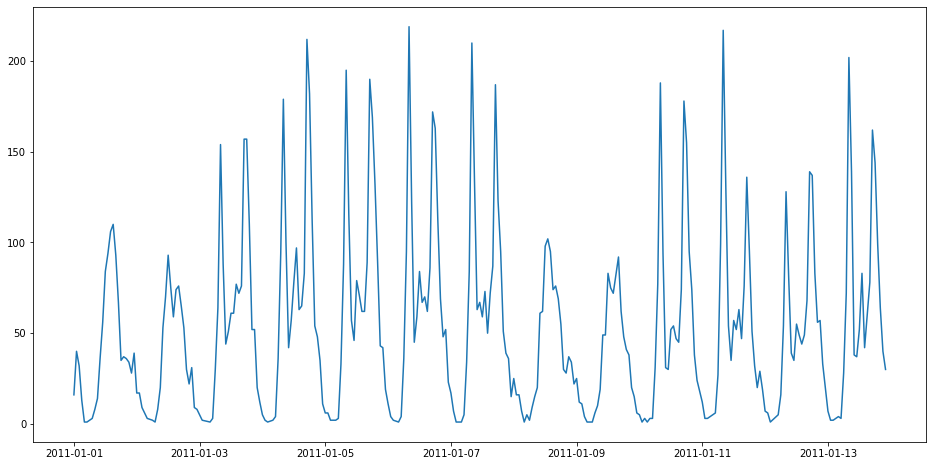

In [12]:
plt.figure(figsize=(16,8))
plt.plot(df_1.set_index('datetime')["count"][0:300])
plt.show()

<AxesSubplot:xlabel='year', ylabel='count'>

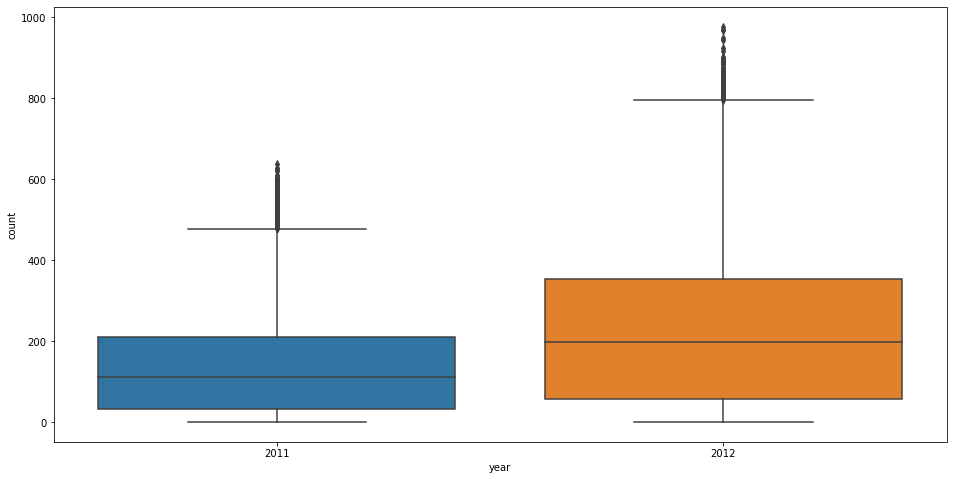

In [13]:
# bikes rented per year
plt.figure(figsize=(16,8))
sns.boxplot(x='year',y='count', data=df_1)

<AxesSubplot:xlabel='month', ylabel='count'>

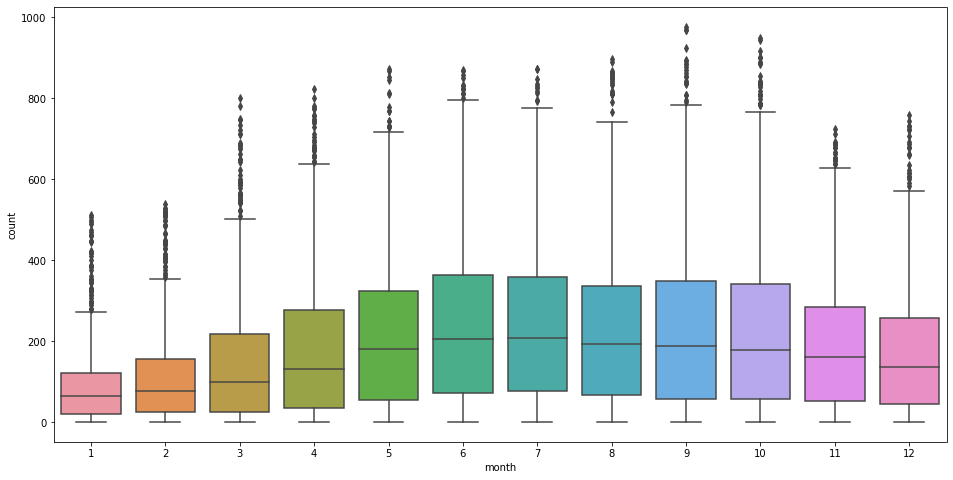

In [14]:
# Bikes rented per month
plt.figure(figsize=(16,8))
sns.boxplot(x='month',y='count', data=df_1)

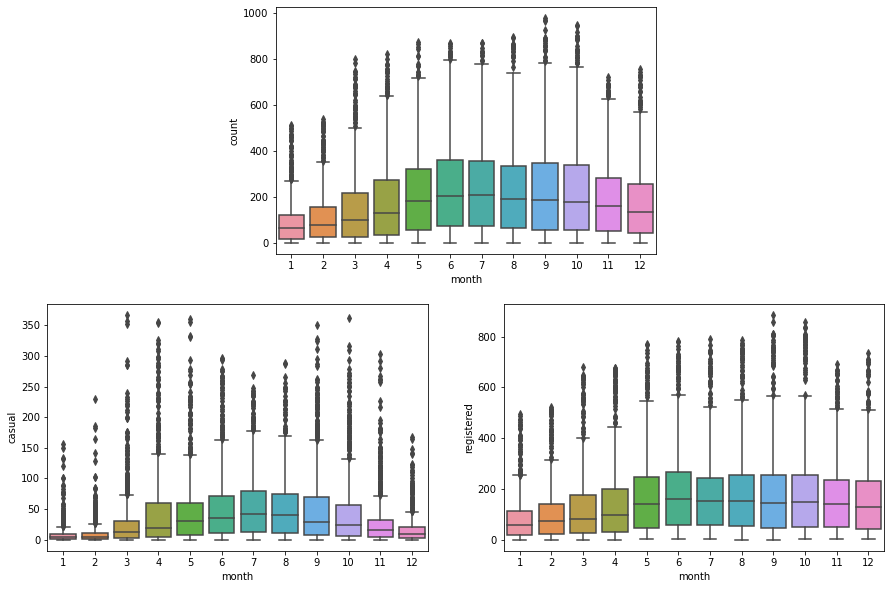

In [15]:
# month
# non-registered user: less rentals in spring & winter
# registered user: less rentals in spring
fig = plt.figure(figsize=(15, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='month', y='count', data=df_1)
plt.subplot(gs1[2:, :2])
sns.boxplot(x='month', y='casual', data=df_1)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='month', y='registered', data=df_1)
plt.show()

In [16]:
df_1.set_index('datetime', inplace=True)

<AxesSubplot:>

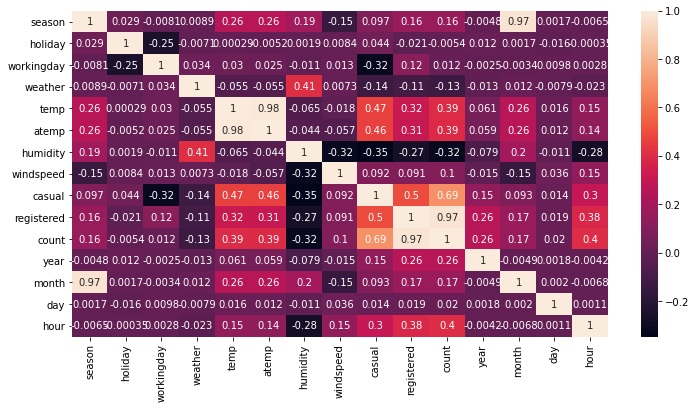

In [52]:
plt.figure(figsize = (12,6))
sns.heatmap(df_1.corr(),annot=True)

In [18]:
df_1.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [37]:
y = df_1['count']
X =df_1.drop(labels=['count'], axis=1)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)


## Data have to be splitted for Date?

In [39]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((7620, 14), (7620,), (3266, 14), (3266,))

In [40]:
y_train.head()

datetime
2011-12-16 23:00:00     75
2011-10-11 09:00:00    235
2011-03-06 23:00:00      9
2012-10-06 23:00:00    179
2011-10-06 08:00:00    457
Name: count, dtype: int64

In [41]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour
datetime,,,,,,,,,,,,,,
2011-12-16 23:00:00,4,0,1,2,12.30,15.150,49,8.9981,4,71,2011,12,16,23
2011-10-11 09:00:00,4,0,1,2,24.60,29.545,69,0.0000,40,195,2011,10,11,9
2011-03-06 23:00:00,1,0,0,2,9.02,9.850,100,27.9993,0,9,2011,3,6,23
2012-10-06 23:00:00,4,0,0,1,18.04,21.970,62,8.9981,37,142,2012,10,6,23
2011-10-06 08:00:00,4,0,1,1,18.04,21.970,62,11.0014,20,437,2011,10,6,8


In [42]:
# Linear Regression Model

from sklearn.metrics import mean_squared_error


In [43]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [44]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train,y_train)
y_pred = linear_regression.predict(X_test)

In [45]:
linear_regression.score(X_train,y_train)

1.0

In [46]:
linear_regression.score(X_test,y_test)

1.0

In [48]:
def RMSLE(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2 
    RMSLE = np.sqrt(np.mean(squared_error))
    return RMSLE

In [49]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
pred = linreg.predict(X_test)
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('RMSLE:', RMSLE(y_test_exp, pred_exp))

RMSLE: 1.1942873615322866e-12


C:\Users\vuger\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-49-e2973853dc3f>:5: RuntimeWarning: overflow encountered in expm1
  pred_exp = np.expm1(pred)


In [47]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


r2 = r2_score(y_test,y_pred)
print(rmse)
print(r2)

1.3752294365442139e-12
1.0


In [54]:
# Running RFE with the output number of the variable equal to 15
linreg = LinearRegression()
linreg.fit(X_train, y_train)

rfe = RFE(linreg, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

C:\Users\vuger\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [81]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf_reg = RandomForestRegressor(n_estimators=300)
rf_reg.fit(X_train, y_train)
y_pred2 = rf_reg.predict(X_test)



In [61]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred2))

r3 = r2_score(y_test,y_pred2)
print(rmse)
print(r3)

3.7250800408140936
0.9995917928902279


In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [30, 100, 200, 300],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [30, 100, 200, 300]})

In [80]:
grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 300}

In [88]:
rf_reg = RandomForestRegressor(n_estimators=300, bootstrap= True,
 max_features= 'auto',
 min_samples_split= 2 )
rf_reg.fit(X_train, y_train)
y_pred3 = rf_reg.predict(X_test)


In [89]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred3))

r4 = r2_score(y_test,y_pred3)
print(rmse)
print(r4)

3.6099042054404946
0.9996166453799663


In [90]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle)

RMLSE for the data: 1.0647221727124513e-13


In [97]:
ss = pd.read_csv('sampleSubmission.csv')
ss

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [114]:
# output predictions for submission
